In [1]:
### Observable trends based on data
# 1)Pyber is in more urban cities than suburban or rural.
# 2)Also, there are significantly more urban drivers per city than in suburban or rural. Again, significantly more urban than rural.
# 3)Urban rides cost more on average than rural or suburban, and again, urban much more than rural.


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Step 1: Read in and clean data file  aswell create dataframes to hold the data

city_df = pd.read_csv(city_data_to_load).dropna()
rides_df = pd.read_csv(ride_data_to_load).dropna()

# create a merged dataframe, excluding any cities that we don't have complete data on
city_Rides_df = rides_df.merge(city_df, on='city', how='left')
city_Rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

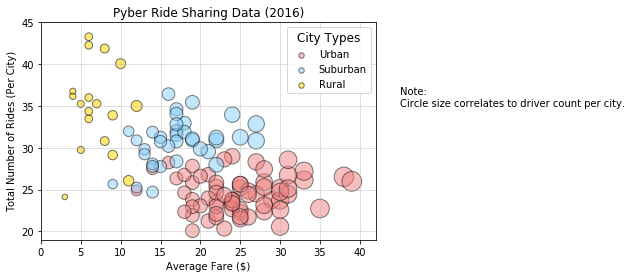

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Step 1
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_city = city_Rides_df.loc[(city_Rides_df["type"] == "Urban")]
suburban_city = city_Rides_df.loc[(city_Rides_df["type"] == "Suburban")]
rural_city = city_Rides_df.loc[(city_Rides_df["type"] == "Rural")]

# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
# Create scatter plots for Urban, Suburban and Rural cities

plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
plt.ylim(19.0, 45.0)
plt.xlim(0, 42)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.set_title("City Types", prop = {'size':'large'})

# Incorporate a text label regarding circle size
plt.text(x=45, y=35, s='Note:\nCircle size correlates to driver count per city.')
# Save an image of the chart and print to screen
plt.savefig("Pyber Ride Sharing.png")
# Show plot
plt.show()


## Total Fares by City Type

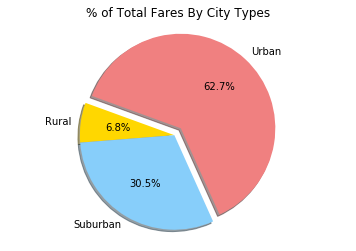

In [4]:
# Calculate Type Percents
# Calculate Total Fare by City Type
total_fare = city_Rides_df.groupby(['type'])['fare'].sum()
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
# Save Figure
plt.savefig("Total Fares By City Types.png")
# Show Figure
plt.show()

## Total Rides by City Type

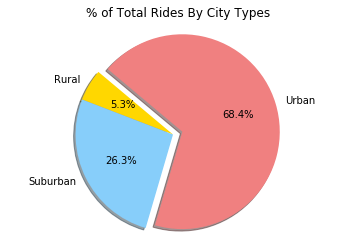

In [6]:
# Calculate Ride Percents
# Calculate Total Fare by City Type
total_rides = city_Rides_df.groupby(['type'])['ride_id'].count()
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("Total Rides By City Types.png")

## Total Drivers by City Type

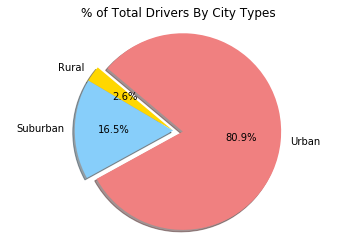

In [8]:
# Calculate Driver Percents
# Calculate Total Drivers by City Type
total_drivers = city_df.groupby(['type'])['driver_count'].sum()
# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("Total Drivers By City Types.png")

In [9]:
# Show Figure
plt.show()